# Introdução ao Pandas

### Trabalhando com Planilhas Excel (CSV)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_mercado.csv')

In [3]:
 df.head(5)

,Descrição,Beneficiario,Data,Valor R$
0,Pagamento de Boleto,NaN,2022-01-03 00:00:00,"22,00"
1,Pagamento conta luz,NaN,2022-01-03 00:00:00,"27,17"
2,Pagamento conta luz,NaN,2022-01-03 00:00:00,"34,21"
3,Pgto conta água,NaN,2022-01-03 00:00:00,"34,83"
4,Pagamento de Boleto,NaN,2022-01-03 00:00:00,"35,00"


In [4]:
# juntando todos os arquivos 
# df =pd.concat([df1, df2, df3...])

In [5]:
# Renomeando colunas 
df = df.rename(columns={'Valor R$ ':'Valor'})
df.head(10)

,Descrição,Beneficiario,Data,Valor
0,Pagamento de Boleto,NaN,2022-01-03 00:00:00,"22,00"
1,Pagamento conta luz,NaN,2022-01-03 00:00:00,"27,17"
2,Pagamento conta luz,NaN,2022-01-03 00:00:00,"34,21"
3,Pgto conta água,NaN,2022-01-03 00:00:00,"34,83"
4,Pagamento de Boleto,NaN,2022-01-03 00:00:00,"35,00"
5,Pgto conta água,NaN,2022-01-03 00:00:00,"36,83"
6,Pgto conta água,NaN,2022-01-03 00:00:00,"38,70"
7,Pgto conta água,NaN,2022-01-03 00:00:00,"39,87"
8,Pgto conta água,NaN,2022-01-03 00:00:00,"41,17"
9,Pagamento conta luz,NaN,2022-01-03 00:00:00,"42,30"


In [6]:
# Alterando o tipo de dado de uma coluna
df['Data'] = pd.to_datetime(df['Data'])

In [9]:
# Alterando o tipo de dado de uma coluna
df['Valor'] = df['Valor'].str.replace(',', '.').astype(float)

In [10]:
# pegando linhas aleatorias 
df.sample(10)

,Descrição,Beneficiario,Data,Valor
5749,Pagamento de Boleto,NaN,2022-02-21,563.03
10050,Pagto conta telefone,TIM S/A,2022-04-07,54.99
5306,Pgto conta água,NaN,2022-02-16,34.83
16194,Pagamento conta luz,CELESC DISTRIBUICAO S.A.,2022-06-09,85.75
19162,Pagamento conta luz,COORSEL,2022-07-11,123.03
6983,Pagamento conta luz,NaN,2022-03-08,71.82
7941,Pagamento conta luz,NaN,2022-03-14,99.87
7016,Pagamento de Boleto,NaN,2022-03-08,99.90
5153,Pagamento de Boleto,NaN,2022-02-15,50.00
727,Pagamento conta luz,NaN,2022-01-07,100.39


In [11]:
df.dtypes

Descrição               object
Beneficiario            object
Data            datetime64[ns]
Valor                  float64
dtype: object

In [12]:
df.isnull().sum()

Descrição          0
Beneficiario    9310
Data               0
Valor              0
dtype: int64

In [13]:
df['Valor'].max()

15100.28

In [14]:
df['Valor'].min()

0.01

In [15]:
# Maiores resultados
df.nlargest(3,"Valor")

,Descrição,Beneficiario,Data,Valor
4475,Pagamento de Boleto,NaN,2022-02-09,15100.28
3176,Pagamento de Boleto,NaN,2022-01-31,14469.23
14360,Pagamento conta luz,COORSEL,2022-05-18,13529.77


In [17]:
# Menores resultados
df.nsmallest(5, "Valor")

,Descrição,Beneficiario,Data,Valor
11476,Pagamento de Boleto,SANTUARIO NAC N S C APARECIDA,2022-04-18,0.01
18824,Pgto conta água,SERVICO AUTONOMO MUNICIPA,2022-07-08,0.15
24783,Pagto conta telefone,VIVO PR E SC,2022-09-09,0.91
3177,Cobrança de I.O.F.,NaN,2022-02-01,0.99
9151,Pgto conta água,NaN,2022-03-29,1.31


In [38]:
df.groupby('Beneficiario')['Valor'].sum()

Beneficiario
247 GUARAPARI COMERCIO DE COMBUSTIVEIS     600.00
3D TELECOMUNICACOES LTDA                  5273.15
48988393098-Claro PR/SC                     50.00
48991141763-Vivo PR e SC                    20.00
48991370395-Vivo PR e SC                    65.00
                                           ...   
ZANOTTO DIESEL CENTER TRUCK LTDA           450.00
ZAPELINI  ZAPELINI LTDA                    281.00
ZEMA CREDITO FINANCIAMENTO E INVESTIME    1316.68
ZOOP TECNOLOGIA I P S A                   2958.20
ZOOP TECNOLOGIA M P S A                    888.20
Name: Valor, Length: 1106, dtype: float64

In [19]:
# Metodo de ordenação
df.sort_values('Beneficiario', ascending=False).head(10)

,Descrição,Beneficiario,Data,Valor
9655,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-04-05,49.9
13606,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-05-10,59.9
10342,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-04-08,59.9
15902,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-06-07,49.9
9346,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-04-01,29.9
10882,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-04-11,69.9
10881,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-04-11,39.9
18259,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-07-05,49.9
17135,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-06-15,39.9
13219,Pagamento de Boleto,ZOOP TECNOLOGIA M P S A,2022-05-09,49.9


### Trabalhando com Datas

In [20]:
# Agrupando por Mes
df.groupby(df['Data'].dt.month)['Valor'].sum()

Data
1    925508.24
2    880038.74
3    979896.90
4    877513.92
5    894040.53
6    857228.12
7    807684.76
8    890794.65
9    919077.09
Name: Valor, dtype: float64

In [21]:
# Criando uma nova coluna com o ano
df["Ano"] = df["Data"].dt.year

In [22]:
df.sample(5)

,Descrição,Beneficiario,Data,Valor,Ano
7266,Pagamento conta luz,NaN,2022-03-09,118.13,2022
2223,Pagamento de Boleto,NaN,2022-01-17,279.16,2022
23247,Pagamento de Boleto,EBANX LTDA,2022-08-23,52.19,2022
12531,Pagamento de Boleto,BANCO SICOOB S.A.,2022-05-05,255.00,2022
25957,Pgto conta água,SERVICO AUTONOMO MUNICIPA,2022-09-19,219.41,2022


In [23]:
# Extraindo o mes e o dia 
df['Mes'], df['Dia'] = (df['Data'].dt.month, df['Data'].dt.day)

In [25]:
df.sample(5)

,Descrição,Beneficiario,Data,Valor,Ano,Mes,Dia
25037,Pagamento conta luz,COORSEL,2022-09-12,236.99,2022,9,12
11315,Pagamento de Boleto,BANCO DO BRASIL,2022-04-18,748.57,2022,4,18
13068,Pagamento de Boleto,FIDC DMCARD CARTOES DE CREDITO,2022-05-09,126.56,2022,5,9
19061,Pagamento conta luz,CELESC DISTRIBUICAO S.A.,2022-07-11,39.97,2022,7,11
152,Pagamento de Boleto,NaN,2022-01-04,53.11,2022,1,4


In [26]:
#retornando a data mais antiga
df['Data'].min()

Timestamp('2022-01-03 00:00:00')

In [27]:
# Criando a coluna de trimestre
df['Trimestre'] = df['Data'].dt.quarter

In [28]:
df.sample(5)

,Descrição,Beneficiario,Data,Valor,Ano,Mes,Dia,Trimestre
10793,Pgto conta água,SERVICO AUTONOMO MUNICIPA,2022-04-11,55.45,2022,4,11,2
7644,Pagamento conta luz,NaN,2022-03-10,233.84,2022,3,10,1
12431,Pagamento de Boleto,SPAL INDUSTRIA BRASILEIRA BEBIDAS SA,2022-05-03,219.91,2022,5,3,2
3109,Pgto conta água,NaN,2022-01-31,154.54,2022,1,31,1
3401,Pagamento conta luz,NaN,2022-02-03,404.72,2022,2,3,1


In [30]:
# Soma dos valores pelo trimestre
df.groupby(df['Trimestre'])['Valor'].sum()

Trimestre
1    2785443.88
2    2628782.57
3    2617556.50
Name: Valor, dtype: float64

In [34]:
# Filtrando os valores do mes de março
valores =df.loc[(df['Data'].dt.year == 2022) & (df['Data'].dt.month == 3)]


In [35]:
valores.sample(15)

,Descrição,Beneficiario,Data,Valor,Ano,Mes,Dia,Trimestre
7768,Pagamento de Boleto,NaN,2022-03-11,99.30,2022,3,11,1
8171,Pagamento de Boleto,NaN,2022-03-15,150.00,2022,3,15,1
7258,Pgto conta água,NaN,2022-03-09,106.43,2022,3,9,1
8346,Pagamento de Boleto,NaN,2022-03-16,285.86,2022,3,16,1
7444,Pagamento de Boleto,NaN,2022-03-10,33.89,2022,3,10,1
8428,Pagamento de Boleto,NaN,2022-03-17,142.42,2022,3,17,1
8498,INSS Arrecadação,NaN,2022-03-18,60.60,2022,3,18,1
8942,Pagamento conta luz,NaN,2022-03-24,312.54,2022,3,24,1
6765,Pgto conta água,NaN,2022-03-07,266.66,2022,3,7,1
7836,Pagamento conta luz,NaN,2022-03-11,439.17,2022,3,11,1


### Visualização de Dados

In [37]:
# Mostra quantas vezes se repete dentro da tabela
df['Descrição'].value_counts(ascending=False)

Pagamento de Boleto         14050
Pagamento conta luz          5374
Pgto conta água              3464
Pagto conta telefone         2032
Impostos                     1383
INSS Arrecadação              303
Telefone Pre-Pago              59
Pagto Energia Elétrica         36
Pagto via Auto-Atend.BB        23
Pagto cartão crédito           18
Pagamento Fatura de Água       18
Compra com Cartão              11
Cobrança de I.O.F.              3
Pagamentos Diversos             1
Name: Descrição, dtype: int64

<AxesSubplot:>

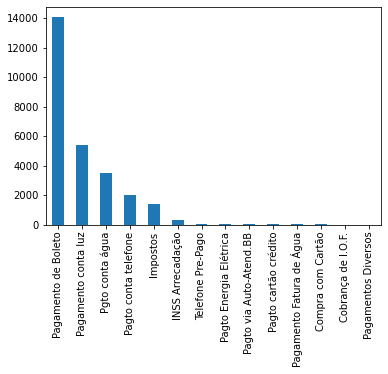

In [39]:
df['Descrição'].value_counts(ascending=False).plot.bar()

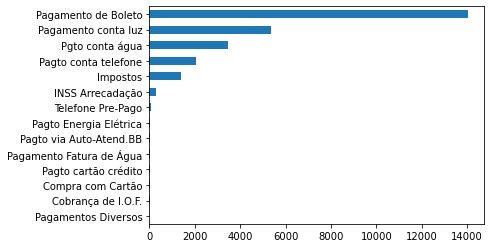

In [42]:
df['Descrição'].value_counts(ascending=True).plot.barh();

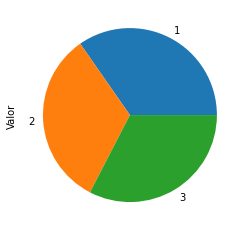

In [44]:
df.groupby(df['Trimestre'])['Valor'].sum().plot.pie();

In [45]:
import matplotlib.pyplot as plt

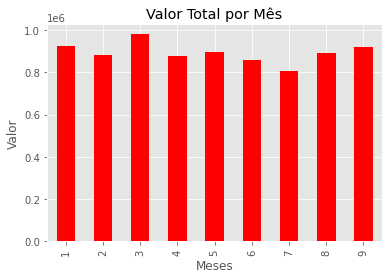

In [60]:
df.groupby(df['Mes'])['Valor'].sum().plot.bar(title='Valor Total por Mês', color='red')
plt.xlabel('Meses')
plt.ylabel('Valor');


In [61]:
# Alterando o estilo
plt.style.use('ggplot')

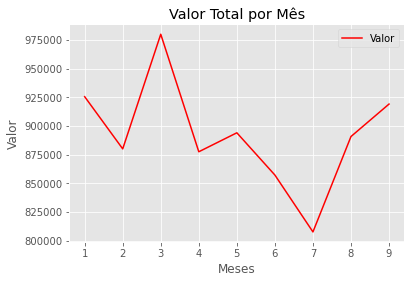

In [63]:
df.groupby(df['Mes'])['Valor'].sum().plot(title='Valor Total por Mês', color='red')
plt.xlabel('Meses')
plt.ylabel('Valor');
plt.legend();
